# Úkol 2: Test hypotézy

Načtení potřebných knihoven

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import contextily as ctx
import sklearn.cluster
import numpy as np
import os
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

Načtení dat "accidents.pkl.gz".

In [2]:
df = pd.read_pickle("accidents.pkl.gz")

### Hypotéza 1:

"Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako na silnicích třetí třídy."

Filtrace nepotřebných údajů v DataFramu.

In [3]:
df2 = df[['p13a', 'p36']] # p36 = druh komunikace, p45a = znacka vozu (39 = skoda, 2 = audi)
df2 = df2[(df2.p36 == 1) | (df2.p36 == 3)] # 1 = silnice 1. třídy, 3 = silnice 3. třídy

Vytvoření DataFrame pro ukládání potřebných hodnot do sloupců 

In [4]:
df2.loc[df2.p13a > 0 , 'p13a'] = 1      # 1 = úmrtí při nehodě
df2.loc[df2.p13a == 0 , 'p13a'] = 0     # 0 = nehoda bez úmrtí
df2.loc[df2.p36 == 1, 'p36'] = 1        # 1 = silnice 1. třídy
df2.loc[df2.p36 == 3, 'p36'] = 0        # 0 = silnice 3. třídy

Vytvoření crosstable pro zjištění závislosti mezi úmrtím při nehodě a druhem komunikace

In [5]:
ct = pd.crosstab(df2['p13a'], df2['p36']).rename(columns={'p13a': 'dead', 'p36':'road_class'})
print(ct)

p36       0      1
p13a              
0     73352  78618
1       448    911


Potvrzení/vyvrácení nulové hypotézy H0 pomoci chi kvadrat testu.

In [6]:
g, p, dof, expctd = stats.chi2_contingency(ct)

if(p < 0.05):
    print("H0 je zamítána a přijímáme alternativní hypotézu: \nNa silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako na silnicích třetí třídy.")
else:
    print("H0 nezamítáme. \nNa silnicích první třídy se při nehodách neumíralo se stejnou pravděpodobností jako na silnicích třetí třídy. ")

H0 je zamítána a přijímáme alternativní hypotézu: 
Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako na silnicích třetí třídy.


##### Závěr: 
##### H0 je zamítána a přijímáme alternativní hypotézu: Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako na silnicích třetí třídy.


### Hypotéza 2
"Při nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi."

Filtrace nepotřebných údajů z již načteného DataFramu.

In [7]:
df3 = df[['p45a', 'p14']] #  p45a = znacka vozu (39 = skoda, 2 = audi); p14 = celkova hmotna skoda
df3 = df3[(df3.p45a == 39) | (df3.p45a == 2)] # (39 = skoda, 2 = audi);

Vykreslení boxplotu pro znázornění rozložení dat.

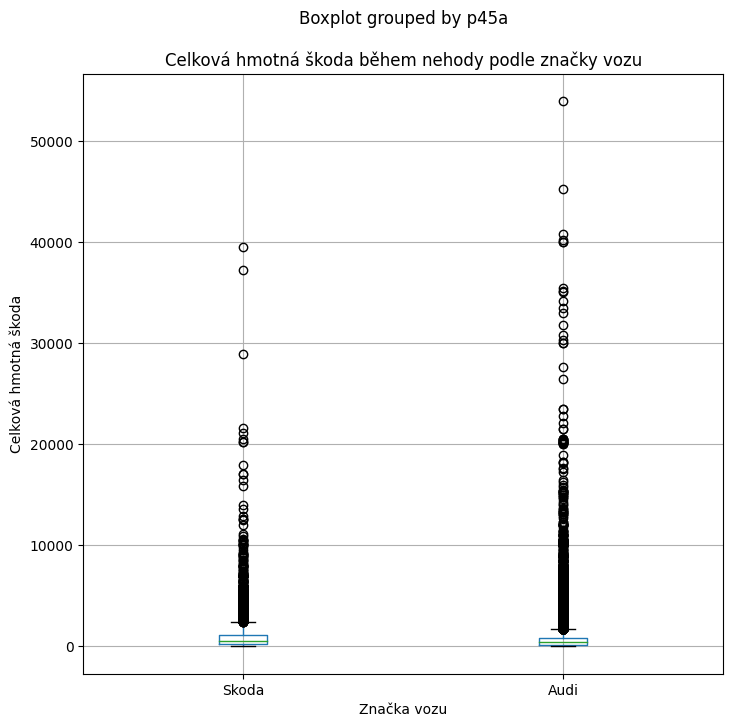

In [8]:
df3.boxplot(column='p14', by='p45a', figsize=(8,8))
plt.title('Celková hmotná škoda během nehody podle značky vozu')
plt.xlabel('Značka vozu')
plt.ylabel('Celková hmotná škoda')
plt.xticks([1,2], ['Skoda', 'Audi'])
plt.show()

Vytvoření nového DataFramu pro záznamu a výpočet mediánů.

In [9]:
df_test = df3

a = df_test.loc[df3.p45a == 2, "p14"]
b = df_test.loc[df3.p45a == 39, "p14"]

print(a.median(), b.median())

500.0 400.0


Využití T - testu k určení hypotéz.

In [10]:
ttest = ttest_ind(a, b) 
ttest_p = ttest.pvalue

print(ttest_p)
print(ttest)

9.244127363326008e-121
Ttest_indResult(statistic=23.391701716453692, pvalue=9.244127363326008e-121)


Vyhodnocení testu a případné zamítnutí/nezamítnutí nulové hypotézy.

In [11]:
if(ttest_p  < 0.05):
    print("H0 je zamítána a přijímáme alternativní hypotézu: \nPři nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi.")
else:
    print("H0 nezamítáme. \nPři nehodách vozidel značky Škoda není škoda na vozidle nižší než při nehodách vozidel Audi.")

H0 je zamítána a přijímáme alternativní hypotézu: 
Při nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi.


##### Závěr:
H0 je zamítána a přijímáme alternativní hypotézu: 
Při nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi.